# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
In this project I will beworking with TMDB dataset, this data set contains nearly 10,000 movies, it has 21 columns including user ratings, imdb id, popularity, budget, and much more.

#### Questions that I will answer through exploring the dataset
* Which movies made most and least profit?
* Which movies made most and least revenue?
* Which movies have the longest and shortest runtime values?
* What is the average runtime of the movies given in the dataset?
* Which directors made most profits due to the dataset?
* Which actors are the most succesful?
* Which genres are the most succesful?

In [1]:
# Import statements for all of the packages that I plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties of the dataset to help me determine how to clean the data and wrangle it

In [2]:
# Loading the data from the csv file.
df = pd.read_csv('tmdb-movies.csv')

# Printing first five rows of tmdb-movies dataset.
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Some useful information about the dataset like the columns and their values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Some statistical properties of the dataset.
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

## Observations
* There are some extra columns that aren't needed (or can't be considered in the comparison process) in the analysis process as they will make no difference, such as id, idmb_id, homepage, tagline, keyword, production company...etc.
* There are some duplicate entries that I will remove.
* There are entries with NaN values which I will remove.
* Release date isn't in the right format, then I will conver it to datetime format.
* There is some zero value entries in runtime and revenue and that's invalid enreies so I will replace them with Nan, then I will remove then with the other Nan Values

#### 1. Removing the extra un-needed columns

In [5]:
# Deleting the columns id, idmb_id, homepage, tagline, keyword, production company...etc.
columns = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'tagline', 'vote_count', 'vote_average']
df.drop(columns, axis=1, inplace=True)

# Let's see the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(5)
memory usage: 764.1+ KB


#### 2. Removing the duplicate entries

In [6]:
# Removing the duplicate rows.
df.drop_duplicates(inplace=True)

# Let's see the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(5)
memory usage: 848.8+ KB


#### 3. Replacing the zero values in the runtime, budget and revenue columns with NaN

In [7]:
col_with_0 = ['runtime', 'budget', 'revenue']
df[col_with_0] = df[col_with_0].replace(0, np.NaN)

# Let's see the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
budget            5169 non-null float64
revenue           4849 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10834 non-null float64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 848.8+ KB


#### 4. Removing entries with NaN Values.

In [8]:
# Removing entries with NaN Values.
df.dropna(inplace = True)

# Let's see the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_date      3849 non-null object
release_year      3849 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 300.7+ KB


Note that the data type of budget and revenue and runtime changed to float instead of integers so I will turn them back to integers

#### 5. Changing the data type of revenue, budget, and runtime entries.

In [9]:
df[col_with_0] = df[col_with_0].applymap(int)

# Let's see the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null object
release_year      3849 non-null int64
dtypes: int64(4), object(5)
memory usage: 300.7+ KB


#### 6. Converting release date format to datetime.

In [10]:
# The right format will make exploration of the data easier.
df['release_date'] = pd.to_datetime(df['release_date'])

# Let's see the result.
df.head()

budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   
4  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller   2015-06-09   
1      120  Action|Adventure|Science Fiction|Thriller   2015-05-13   
2      119         Adventure|Science Fiction|Thriller   2015-03-18   
3      136   Action|Adventure|Science Fiction|Fantasy   2015-12-15   
4      137                      Action|Crime|Thriller   2015-04-01   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movies made most and least profit?

Let's see the movies with top and last 10 movies with respect to profit.
We need to get the profit of each movie in a column first so that we could use it in our calculation

> profit = revenue - budget

In [11]:
# Let's make a column of the profit for each movie
df['profit'] = df['revenue'] - df['budget']

df[['original_title', 'budget', 'revenue', 'profit']].head()

original_title     budget     revenue      profit
0                Jurassic World  150000000  1513528810  1363528810
1            Mad Max: Fury Road  150000000   378436354   228436354
2                     Insurgent  110000000   295238201   185238201
3  Star Wars: The Force Awakens  200000000  2068178225  1868178225
4                     Furious 7  190000000  1506249360  1316249360

In [12]:
# First, let's get the top 10
top_profit = df.nlargest(10, 'profit')
top_profit[['original_title','profit']]

original_title      profit
1386                                        Avatar  2544505847
3                     Star Wars: The Force Awakens  1868178225
5231                                       Titanic  1645034188
0                                   Jurassic World  1363528810
4                                        Furious 7  1316249360
4361                                  The Avengers  1299557910
3374  Harry Potter and the Deathly Hallows: Part 2  1202817822
14                         Avengers: Age of Ultron  1125035767
5422                                        Frozen  1124219009
8094                                       The Net  1084279658

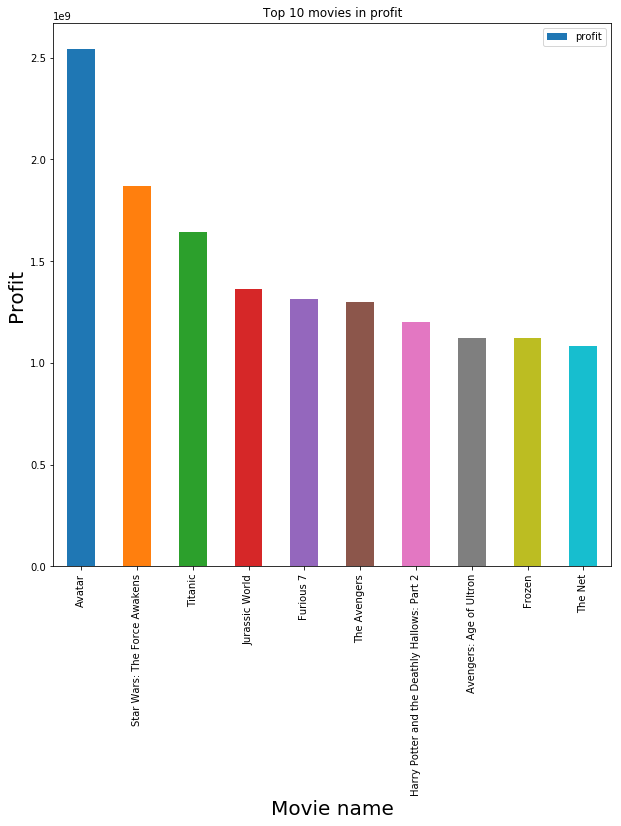

In [13]:
# Let's plot them
top_profit.plot(kind = 'bar', x="original_title", y="profit", title="Top 10 movies in profit" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Profit', fontsize=20);

In [14]:
# Second, let's get the last 10
last_profit = df.nsmallest(10, 'profit')
last_profit[['original_title','profit']]

original_title     profit
2244             The Warrior's Way -413912431
5508               The Lone Ranger -165710090
7031                     The Alamo -119180039
3484               Mars Needs Moms -111007242
4970                  Brother Bear  -99999750
2435              The 13th Warrior  -98301101
4078  The Adventures of Pluto Nash  -92896027
6707               Charlotte's Web  -84999856
6590                  Flushed Away  -84540684
2915                     Australia  -80445998

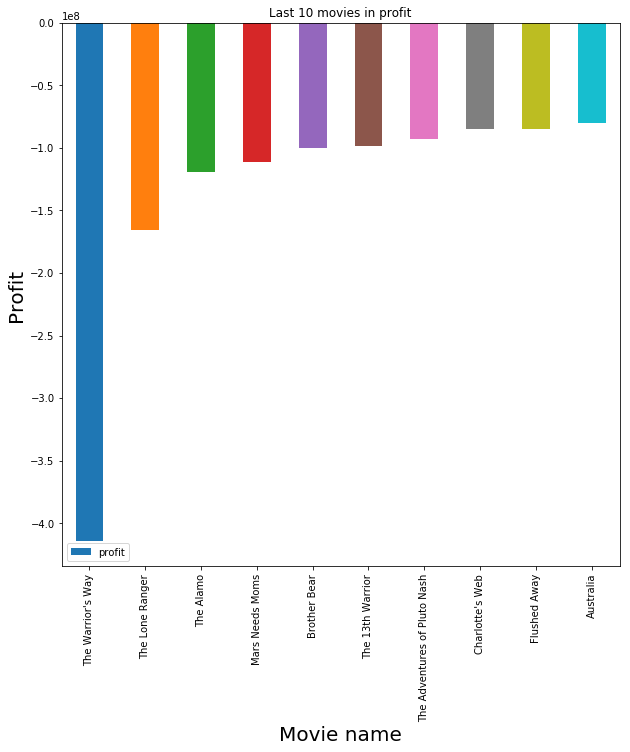

In [15]:
# Let's plot them
last_profit.plot(kind = 'bar', x="original_title", y="profit", title="Last 10 movies in profit" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Profit', fontsize=20);

Note that the previous plot values aree negative as these movies reveneu are less than their budget.

### Research Question 2: Which movies made most and least revenue?

In [16]:
# First, let's get the top 10
top_revenue = df.nlargest(10, 'revenue')
top_revenue[['original_title','revenue']]

original_title     revenue
1386                                        Avatar  2781505847
3                     Star Wars: The Force Awakens  2068178225
5231                                       Titanic  1845034188
4361                                  The Avengers  1519557910
0                                   Jurassic World  1513528810
4                                        Furious 7  1506249360
14                         Avengers: Age of Ultron  1405035767
3374  Harry Potter and the Deathly Hallows: Part 2  1327817822
5422                                        Frozen  1274219009
5425                                    Iron Man 3  1215439994

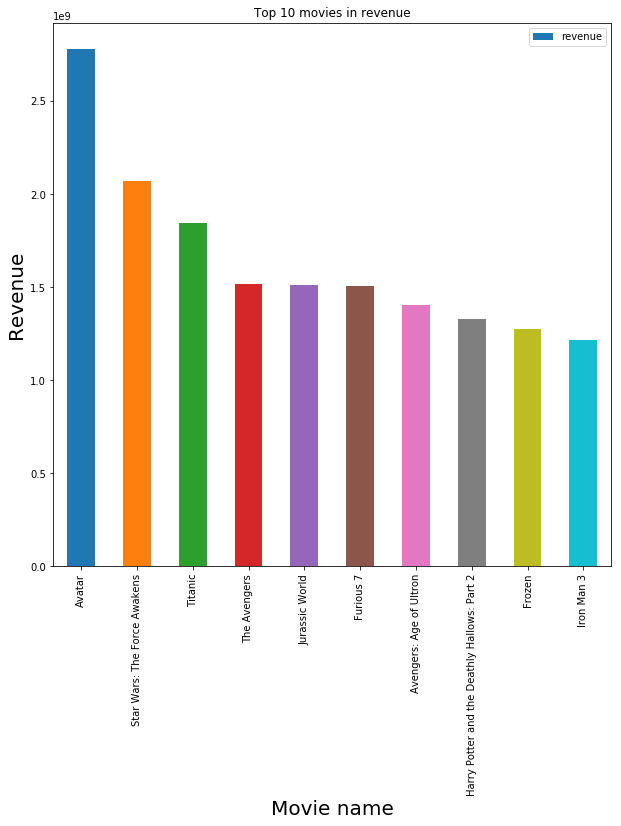

In [17]:
# Let's plot them
top_revenue.plot(kind = 'bar', x="original_title", y="revenue", title="Top 10 movies in revenue" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Revenue', fontsize=20);

In [18]:
# Second, let's get the last 10
last_revenue = df.nsmallest(10, 'revenue')
last_revenue[['original_title','revenue']]

original_title  revenue
5067                  Shattered Glass        2
8142                         Mallrats        2
3239   Dr. Horrible's Sing-Along Blog        3
5162                      Kid's Story        5
8523                Bordello of Blood        5
8226          Never Talk to Strangers        6
10307        The House of the Spirits        6
5852                     Hross Ã­ oss       11
8235              Tales from the Hood       11
10777                        F.I.S.T.       11

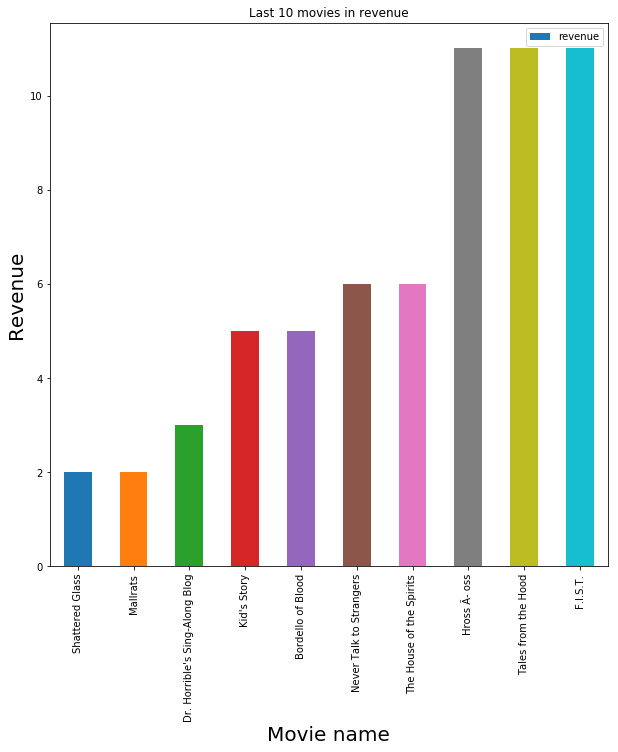

In [19]:
# Let's plot them
last_revenue.plot(kind = 'bar', x="original_title", y="revenue", title="Last 10 movies in revenue" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Revenue', fontsize=20);

### Research Question 3: Which movies have the longest and shortest runtime values?

I will sort the dataset due to runtime and get the top 10 and last 10 of the dataset

In [20]:
# First, let's get the top 10
top_runtime = df.nlargest(10, 'runtime')
top_runtime[['original_title','runtime']]

original_title  runtime
2107                                          Carlos      338
10443                                      Cleopatra      248
7332                                   Heaven's Gate      219
9850                              Lawrence of Arabia      216
5065                               Gods and Generals      214
3110                                    Jodhaa Akbar      213
8282                                       Malcolm X      202
4949   The Lord of the Rings: The Return of the King      201
9758                          The Godfather: Part II      200
10716                   The Greatest Story Ever Told      199

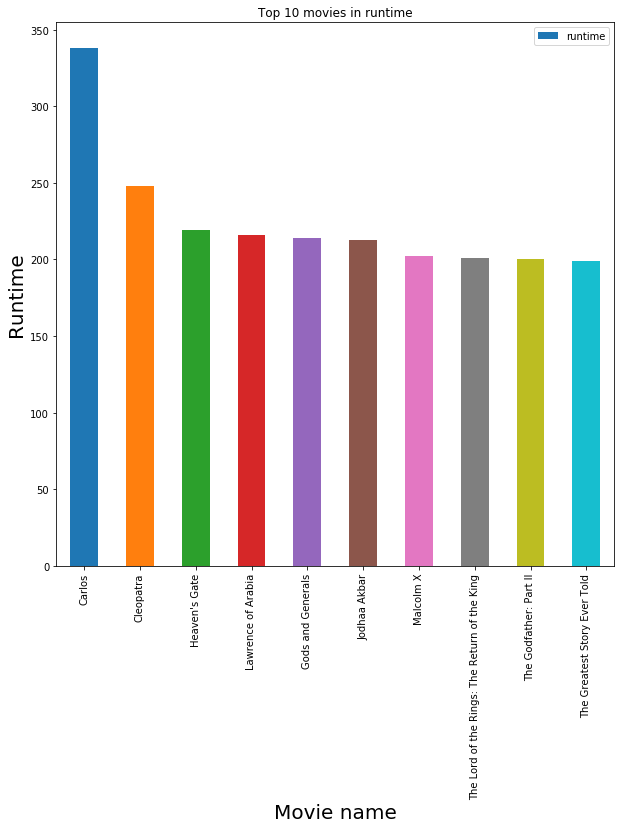

In [21]:
# Let's plot them
top_runtime.plot(kind = 'bar', x="original_title", y="runtime", title="Top 10 movies in runtime" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Runtime', fontsize=20);

In [22]:
# Second, let's get the last 10
last_runtime = df.nsmallest(10, 'runtime')
last_runtime[['original_title','runtime']]

original_title  runtime
5162                              Kid's Story       15
8005                 Mickey's Christmas Carol       26
3239           Dr. Horrible's Sing-Along Blog       42
3818   Louis C.K.: Live at the Beacon Theater       62
3424                          Winnie the Pooh       63
7020                                  9 Songs       66
9462                     The Land Before Time       69
10093                        Paris is Burning       71
4000                     Return to Never Land       72
4966                        The Jungle Book 2       72

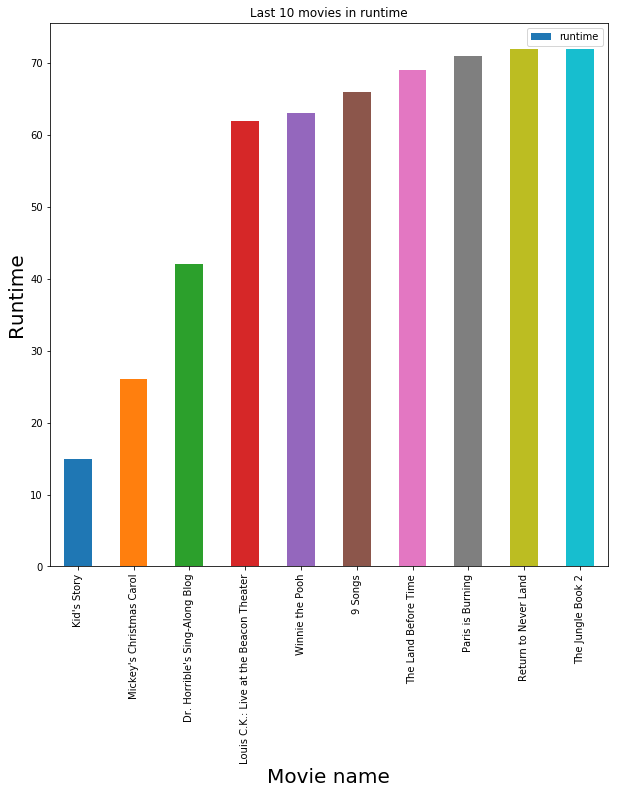

In [23]:
# Let's plot them
last_runtime.plot(kind = 'bar', x="original_title", y="runtime", title="Last 10 movies in runtime" , figsize=(10,10));
plt.xlabel('Movie name', fontsize=20);
plt.ylabel('Runtime', fontsize=20);

We see that the longest movie in runtime is 'Carlos' with 338 minutes, and the shortest movie is 'Kid's Story'	with 15 minutes

### Research Question 4: What is the average runtime of the movies given in the dataset?

In [24]:
print('The average runtime of the dataset is nearly %d minutes.' %df['runtime'].mean())

The average runtime of the dataset is nearly 109 minutes.


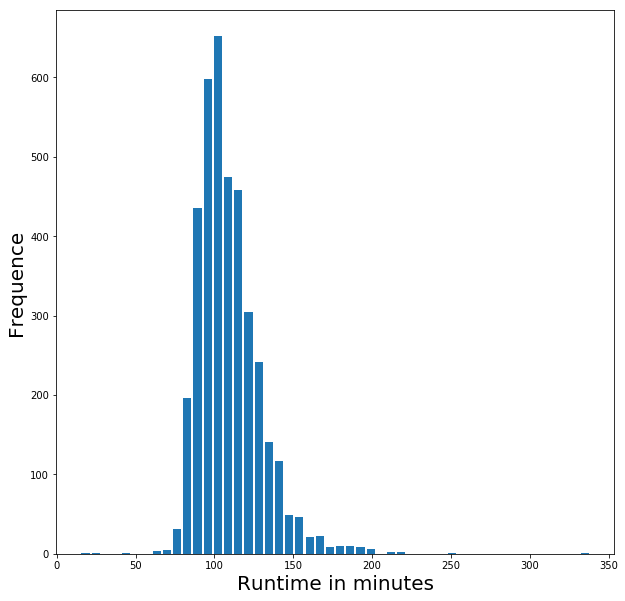

In [25]:
df['runtime'].plot(kind='hist', figsize=(10,10), rwidth = 0.8, bins =50);
plt.xlabel('Runtime in minutes', fontsize=20);
plt.ylabel('Frequence', fontsize=20);

As we see, most of the movies run time is between 75 to 125 minutes.  Let's get some statistical information about the runtime.

In [26]:
df['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Research Question 5: Which directors made most profits due to the dataset?
Let's see which directors are more successful in achieving more profit with their movies

In [27]:
top_directors = df.groupby('director').sum().nlargest(10, 'profit')
top_directors

budget     revenue  runtime  release_year      profit
director                                                                    
Steven Spielberg   1551500000  9018563772     3657         53860  7467063772
Peter Jackson      1326000000  6523244659     1668         22041  5197244659
James Cameron       759900000  5841894863     1110         15953  5081994863
Michael Bay        1360000000  4917208171     1614         22052  3557208171
David Yates         775000000  4154295625      567          8037  3379295625
Christopher Nolan  1005000000  4167548502     1135         16057  3162548502
Chris Columbus      609000000  3725631503     1150         18007  3116631503
George Lucas        360554000  3316550893      735         11927  2955996893
Robert Zemeckis    1023000000  3869690869     1802         29954  2846690869
J.J. Abrams         740000000  3579169916      633         10054  2839169916

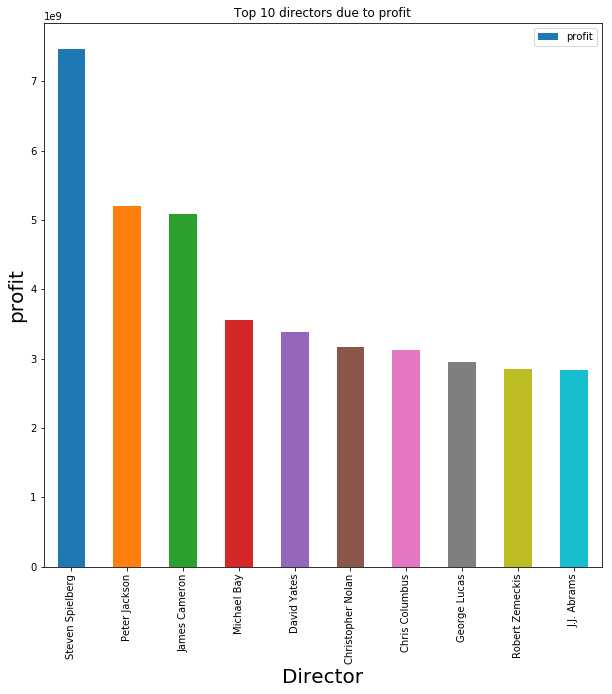

In [28]:
# Let's plot them
top_directors.plot(kind = 'bar', y="profit", title="Top 10 directors due to profit" , figsize=(10,10));
plt.xlabel('Director', fontsize=20);
plt.ylabel('profit', fontsize=20);

### Research Question 6: Which actors are the most succesful?
Let's see which actors appeared most in the dataset.

In [29]:
# Taking the cast column, and separate the string in it by '|'
# and get the top 10 occurences
top_actors = pd.Series(df[df['profit'] > df['profit'].mean()]['cast'].str.cat(sep = '|').split('|')).value_counts().nlargest(10)
top_actors

Tom Cruise            26
Brad Pitt             20
Sylvester Stallone    20
Tom Hanks             20
Adam Sandler          19
Cameron Diaz          18
Bruce Willis          17
Jim Carrey            16
Ben Stiller           16
Eddie Murphy          16
dtype: int64

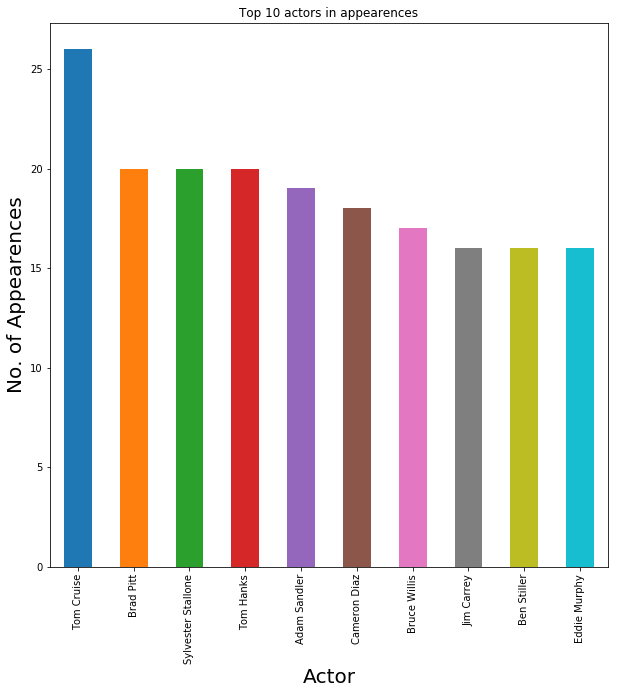

In [30]:
# Let's plot them
top_actors.plot(kind = 'bar', title="Top 10 actors in appearences" , figsize=(10,10));
plt.xlabel('Actor', fontsize=20);
plt.ylabel('No. of Appearences', fontsize=20);

We can see the top actor according to appearances is 'Robert De Niro' with 52 appearence.


### Research Question 7:  Which genres are the most succesful  ?
Let's see which genres have appeared most in the dataset.

In [31]:
# Taking the genres column, and separate the string in it by '|'
# and get the top 5 occurences
top_genres = pd.Series(df[df['profit'] > df['profit'].mean()]['genres'].str.cat(sep = '|').split('|')).value_counts().nlargest(5)
top_genres

Comedy       386
Action       385
Drama        368
Adventure    321
Thriller     312
dtype: int64

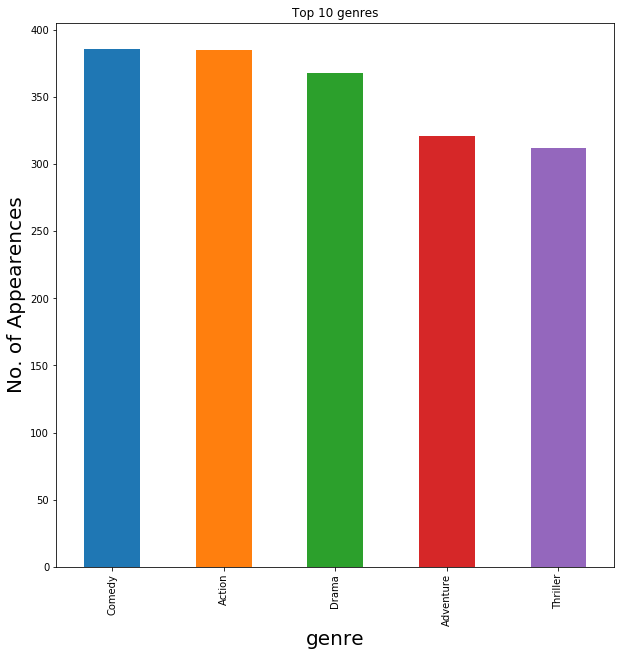

In [32]:
# Let's plot them
top_genres.plot(kind = 'bar', title="Top 10 genres" , figsize=(10,10));
plt.xlabel('genre', fontsize=20);
plt.ylabel('No. of Appearences', fontsize=20);

<a id='conclusions'></a>
## Conclusions
> Through this analysis process we discovered some interesting insights and facts about movies, In conclusion:
* High revenue or budget doesn't mean that the profit is high.
* Movies can have mulible genres
* Not all the movies from a dataset can be considered in the comparison.
* Not all the data come in a clean and desired shape
* It's necessary to have a deep look at the data to figure out how to explore it Efficiently

> For a movie to have a profit above the average:
* Its director should be from those directors: David Yates, Michael Bay	, James Cameron, Peter Jackson, Steven Spielberg, Christopher Nolan	
* Its cast should have one or more of those actors: Tom Cruise, Tom Hanks, Sylvester Stallone, Brad Pitt, Adam Sandler, Cameron Diaz, Bruce Willis, Will Smith, Eddie Murphy, and Jim Carrey
* Its genre should be from these genres: Comedy, Action, Drama, Adventure, Thriller

###  Limitations:
> * The Analysis done in this report was done to the movies that have profit above the average to be cosidered in as a successful movie.
* There was a lot of movies removed in the data cleaning process, which I think could be manipulated by another process to fill the non-value ones.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0